### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import cufflinks as cf
cf.go_offline()
import warnings
warnings.filterwarnings("ignore")

### Loading stock information

In [2]:
# For Tesla use TSLA
# For Apple use AAPL
# For Ford Motor use F
# For Microsoft Corporation use MSFT
# For Netflix use NFLX
co = 'TSLA'

In [3]:
start_date = datetime(2010,1,2)

In [4]:
stock = data.DataReader(co, 'yahoo', start_date)

In [5]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2314 entries, 2010-06-29 to 2019-09-06
Data columns (total 6 columns):
High         2314 non-null float64
Low          2314 non-null float64
Open         2314 non-null float64
Close        2314 non-null float64
Volume       2314 non-null int64
Adj Close    2314 non-null float64
dtypes: float64(5), int64(1)
memory usage: 126.5 KB


### Some visual representation of stock's value over time

In [6]:
stock.iplot(kind='candle', xTitle='Date',yTitle='Price', title='Candle Stick Graph')

In [7]:
stock['Adj Close'].iplot(xTitle='Date',yTitle='Price', title='Adj. Close')

In [8]:
from pandas.plotting import autocorrelation_plot, lag_plot

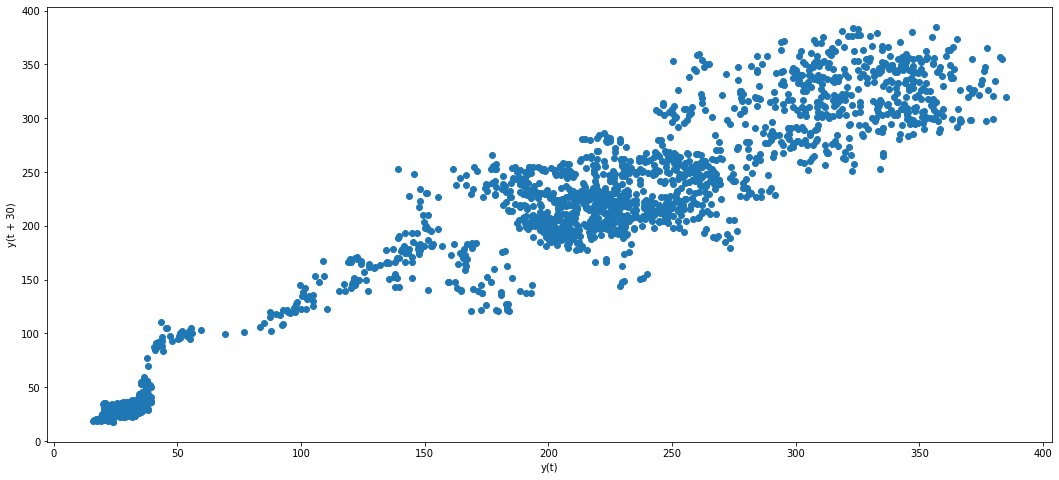

In [9]:
plt.figure(figsize=(18,8))
lag_plot(stock['Adj Close'], lag=30)

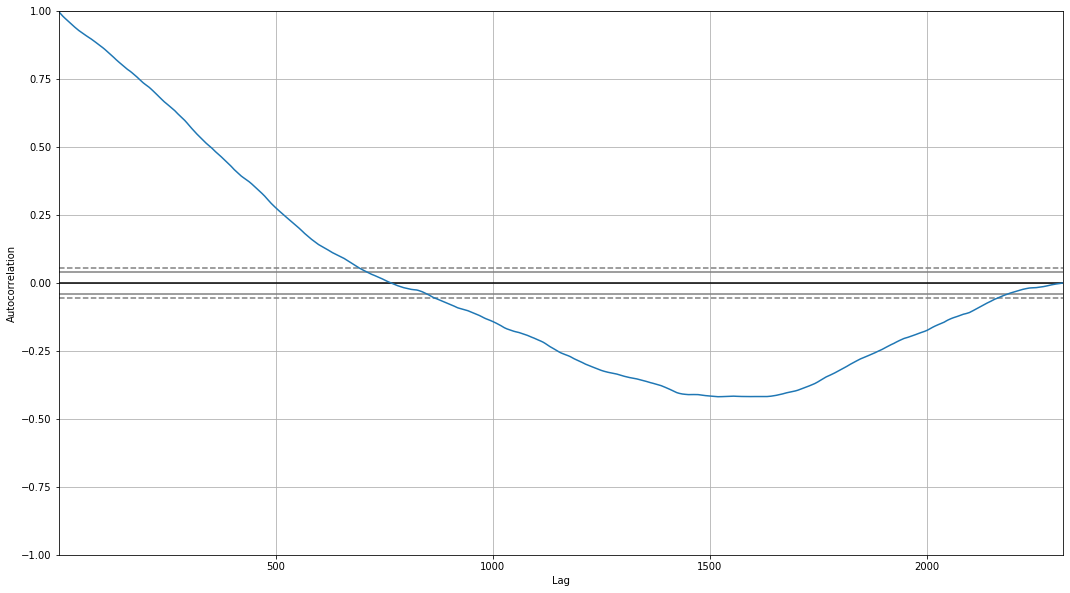

In [10]:
plt.figure(figsize=(18,10))
autocorrelation_plot(stock['Adj Close'])

### Processing Data for machine learnig models

In [11]:
df = stock['Adj Close'].values

In [12]:
df.shape

(2314,)

In [13]:
df = df.reshape(-1,1)

In [14]:
df.shape

(2314, 1)

In [15]:
train_data = np.array(df[:int(df.shape[0]*0.85)])
test_data = np.array(df[int(df.shape[0]*0.85):])

In [16]:
train_data.shape

(1966, 1)

In [17]:
test_data.shape

(348, 1)

In [18]:
train_data

array([[ 23.88999939],
       [ 23.82999992],
       [ 21.95999908],
       ...,
       [287.69000244],
       [293.3500061 ],
       [300.07998657]])

In [19]:
test_data[:5]

array([[290.23999023],
       [283.36999512],
       [283.45999146],
       [280.69000244],
       [285.48001099]])

In [20]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [21]:
train_data = scale.fit_transform(train_data)
test_data = scale.transform(test_data)

In [22]:
def create_seq(data):
    X = []
    y= []
    for i in range(30, len(data)):
        X.append(data[i-30:i, 0])
        y.append(data[i, 0])
    X = np.array(X)
    y = np.array(y)
    return X,y

In [23]:
X_train, y_train = create_seq(train_data)
X_test, y_test = create_seq(test_data)

In [24]:
X_train.shape

(1936, 30)

In [25]:
X_test.shape

(318, 30)

In [26]:
X_train

array([[2.19122405e-02, 2.17497284e-02, 1.66847207e-02, ...,
        1.02654387e-02, 1.02925249e-02, 8.74864707e-03],
       [2.17497284e-02, 1.66847207e-02, 9.20910231e-03, ...,
        1.02925249e-02, 8.74864707e-03, 5.68797245e-03],
       [1.66847207e-02, 9.20910231e-03, 8.39654441e-04, ...,
        8.74864707e-03, 5.68797245e-03, 4.87540680e-03],
       ...,
       [8.60102942e-01, 8.46153879e-01, 8.57258905e-01, ...,
        7.53737775e-01, 7.70693381e-01, 7.45964224e-01],
       [8.46153879e-01, 8.57258905e-01, 8.48591566e-01, ...,
        7.70693381e-01, 7.45964224e-01, 7.36430126e-01],
       [8.57258905e-01, 8.48591566e-01, 8.43364067e-01, ...,
        7.45964224e-01, 7.36430126e-01, 7.51760580e-01]])

### Stock prediction method -1: Support Vector Regression

In [27]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid_svr = {'C': [1, 10, 100], 'gamma': [1,0.1,0.01]} 

In [29]:
model_1 = GridSearchCV(SVR(), param_grid=param_grid_svr)

In [30]:
model_1.fit(X_train, y_train)

D:\Users\Taseen-PC\Miniconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [31]:
model_1.best_params_

{'C': 10, 'gamma': 0.01}

In [32]:
pred1 = model_1.predict(X_test)

In [33]:
print(np.sqrt(mean_squared_error(y_test, pred1)))

0.04755867996578598


### Stock prediction method -2: Gradient Boosting Regression

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

In [35]:
param_grid_gb = {'n_estimators':[50,100,150,200,250,300], 'learning_rate': [0.1,0.01,0.05], 'subsample':[0.5, 0.75,1.0]}

In [36]:
model_2 = GridSearchCV(GradientBoostingRegressor(), param_grid=param_grid_gb)

In [37]:
model_2.fit(X_train, y_train)

D:\Users\Taseen-PC\Miniconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 150, 200, 250, 300], 'learning_rate': [0.1, 0.01, 0.05], 'subsample': [0.5, 0.75, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [38]:
model_2.best_params_

{'learning_rate': 0.05, 'n_estimators': 250, 'subsample': 1.0}

In [39]:
pred2 = model_2.predict(X_test)

In [40]:
print(np.sqrt(mean_squared_error(y_test, pred2)))

0.030094885695919817


### Stock prediction method -3: Stochastic Gradient Descent Regression

In [41]:
from sklearn.linear_model import SGDRegressor

In [42]:
param_grid_sgd = {'max_iter': [5, 10, 15,20,25], 'alpha': [0.0001,0.001,0.01], 'penalty': ['none', 'l2', 'l1', 'elasticnet']}

In [43]:
model_3 = GridSearchCV(SGDRegressor(), param_grid_sgd)

In [44]:
model_3.fit(X_train, y_train)

D:\Users\Taseen-PC\Miniconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_iter': [5, 10, 15, 20, 25], 'alpha': [0.0001, 0.001, 0.01], 'penalty': ['none', 'l2', 'l1', 'elasticnet']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [45]:
model_3.best_params_

{'alpha': 0.01, 'max_iter': 25, 'penalty': 'none'}

In [46]:
pred3 = model_3.predict(X_test)

In [47]:
print(np.sqrt(mean_squared_error(y_test, pred3)))

0.05708070617161817


### Bonous: Deep Learning

In [48]:
# Reshape features for LSTM Layer
X_train_lstm = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [49]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

Using TensorFlow backend.


In [50]:
model_4 = Sequential()
model_4.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_4.add(Dropout(0.5))
model_4.add(LSTM(units=128, return_sequences=True))
model_4.add(Dropout(0.5))
model_4.add(LSTM(units=96))
model_4.add(Dropout(0.3))
model_4.add(Dense(units=1))
model_4.compile(loss='mean_squared_error', optimizer='adam')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [51]:
model_4.fit(X_train_lstm, y_train, epochs=35, batch_size=50, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/35
1936/1936 [==============================] - 5s 3ms/step - loss: 0.0323
Epoch 2/35
1936/1936 [==============================] - 2s 1ms/step - loss: 0.0045
Epoch 3/35
1936/1936 [==============================] - 2s 1ms/step - loss: 0.0038
Epoch 4/35
1936/1936 [==============================] - 2s 1ms/step - loss: 0.0035
Epoch 5/35
1936/1936 [==============================] - 3s 1ms/step - loss: 0.0035
Epoch 6/35
1936/1936 [==============================] - 2s 1ms/step - loss: 0.0032
Epoch 7/35
1936/1936 [==============================] - 2s 1ms/step - loss: 0.0033
Epoch 8/35
1936/1936 [==============================] - 2s 1ms/step - loss: 0.0033
Epoch 9/35
1936/1936 [==============================] - 2s 1ms/step - loss: 0.0031
Epoch 10/35
1936/1936 [==============================] - 2s 1ms/step - loss: 0.0034
Epoch 11/35
1936/1936 [==============================] - 3s 1ms/step - loss: 0.0028
Epoch 12/35
1936/1936 [==============

In [52]:
pred4 = model_4.predict(X_test_lstm)

In [53]:
print(np.sqrt(mean_squared_error(y_test, pred4)))

0.04930856091776959


### Comparing all models

In [54]:
pred1 = pred1.reshape(-1,1)
pred1 = scale.inverse_transform(pred1)

In [55]:
pred2 = pred2.reshape(-1,1)
pred2 = scale.inverse_transform(pred2)

In [56]:
pred3 = pred3.reshape(-1,1)
pred3 = scale.inverse_transform(pred3)

In [57]:
pred4 = pred4.reshape(-1,1)
pred4 = scale.inverse_transform(pred4)

In [58]:
y_test_value = y_test.reshape(-1,1)
y_test_value = scale.inverse_transform(y_test_value)

In [59]:
y_test_value[:5]

array([[296.73999023],
       [291.13000488],
       [319.5       ],
       [316.08999634],
       [317.66000366]])

In [60]:
y_test.shape[0]

318

In [61]:
index = stock.iloc[-y_test.shape[0]:].index

In [62]:
prediction = pd.DataFrame(data={'Adj Close': y_test_value.reshape(-1),'SVR':pred1.reshape(-1), 'GBR': pred2.reshape(-1), 'SGD': pred3.reshape(-1), 'LSTM': pred4.reshape(-1)}, index=index)

In [63]:
prediction.head()

,Adj Close,SVR,GBR,SGD,LSTM
Date,,,,,
2018-06-04,296.739990,283.808959,297.544608,290.289460,278.787842
2018-06-05,291.130005,285.631052,299.214535,291.145275,280.880341
2018-06-06,319.500000,286.025047,297.544608,291.462639,282.876617
2018-06-07,316.089996,291.052786,313.597711,294.410411,286.276825
2018-06-08,317.660004,294.079745,311.452944,296.835646,290.614410


In [64]:
# cf.getThemes()
prediction.iplot(xTitle='Date',yTitle='Price', title='Stock',colors=['yellow', '#ffe880', 'white', '#abc7ff', '#4f34eb'], theme='solar')

### Predict into future

In [65]:
X_seed = df[-30:]
X_seed = scale.transform(X_seed)
X_seed = X_seed.reshape(-1,30)
X_seed.shape

(1, 30)

In [66]:
X1 = X_seed
X2 = X_seed
X3 = X_seed
X4 = X_seed
y1 = []
y2 = []
y3 = []
y4 = []
for i in range(1,31):
    if i==1:
        fp1 = model_1.predict(X_seed)
        fp2 = model_2.predict(X_seed)
        fp3 = model_3.predict(X_seed)
        X_seed_lstm = np.reshape(X_seed, (X_seed.shape[0], X_seed.shape[1], 1))
        fp4 = model_4.predict(X_seed_lstm)
        y1.append(fp1)
        y2.append(fp2)
        y3.append(fp3)
        y4.append(fp4)
        X1 = np.append(X1, fp1)
        X2 = np.append(X2, fp1)
        X3 = np.append(X3, fp1)
        X4 = np.append(X4, fp1)
        
    else:
        fp1 = model_1.predict(X1[-30:].reshape(1,-1))
        fp2 = model_2.predict(X2[-30:].reshape(1,-1))
        fp3 = model_3.predict(X3[-30:].reshape(1,-1))
        X_seed_lstm = X4[-30:].reshape(1,-1)
        X_seed_lstm = np.reshape(X_seed_lstm, (X_seed_lstm.shape[0], X_seed_lstm.shape[1], 1))
        fp4 = model_4.predict(X_seed_lstm)
        y1.append(fp1)
        y2.append(fp2)
        y3.append(fp3)
        y4.append(fp4)
        X1 = np.append(X1, fp1)
        X2 = np.append(X2, fp1)
        X3 = np.append(X3, fp1)
        X4 = np.append(X4, fp1)
y1 = np.array(y1)
y2 = np.array(y2)
y3 = np.array(y3)
y4 = np.array(y4)

In [67]:
y1 = scale.inverse_transform(y1)
y2 = scale.inverse_transform(y2)
y3 = scale.inverse_transform(y3)
y4 = scale.inverse_transform(y4.reshape(30,-1))

In [68]:
prediction_future = pd.DataFrame(data={'SVR':y1.reshape(-1), 'GBR': y2.reshape(-1), 'SGD': y3.reshape(-1), 'LSTM': y4.reshape(-1)})

In [69]:
prediction_future

,SVR,GBR,SGD,LSTM
0,227.353123,226.097493,226.910715,221.722443
1,228.009962,225.798669,227.255711,223.070053
2,228.741709,225.393846,227.578729,224.251419
3,229.526070,225.374373,227.886275,225.256210
4,230.299567,229.402812,228.244090,226.114975
5,231.149774,230.425501,228.707940,226.870483
6,231.626468,231.005203,229.192620,227.566849
7,232.076640,230.964386,229.734317,228.219635
8,232.769828,230.749984,230.263583,228.830658
9,233.322246,232.161214,230.789210,229.415878


In [70]:
prediction_future.iplot()